In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
# Cargar los datos
df = pd.read_csv("/content/NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
# Convertir columna de fecha y ordenar
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [7]:
# Usamos solo el cierre
data = df[['Close']].values
data

array([[121.55],
       [120.9 ],
       [120.65],
       ...,
       [234.25],
       [233.25],
       [233.75]])

In [8]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [17]:
# División entre entrenamiento y prueba (80/20)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # incluir últimos 60 para crear secuencias


In [19]:
# Crear secuencias para entrenamiento
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


# Darle forma para LSTM necesita 3D [samples, timesteps, features]
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [20]:
# Construcción del modelo LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [21]:
# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0139
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0011
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0010
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.6695e-04
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0010
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 9.0616e-04
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.0331e-04
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 8.0015e-04
Epoch 9/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.9865e-04
Epoch 10/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.0815e-04
Epoch 11/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 7.2400e-04
Epoch 12/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.5302e-04
Epoch 13/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.7428e-04
Epoch 14/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.8258e-04
Epoch 15/25
49/49 ━━━━━━━━━━━━━

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [25]:
# Preparar datos de prueba
X_test, y_test = [], data[train_size:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [26]:
# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # volver a escala original

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


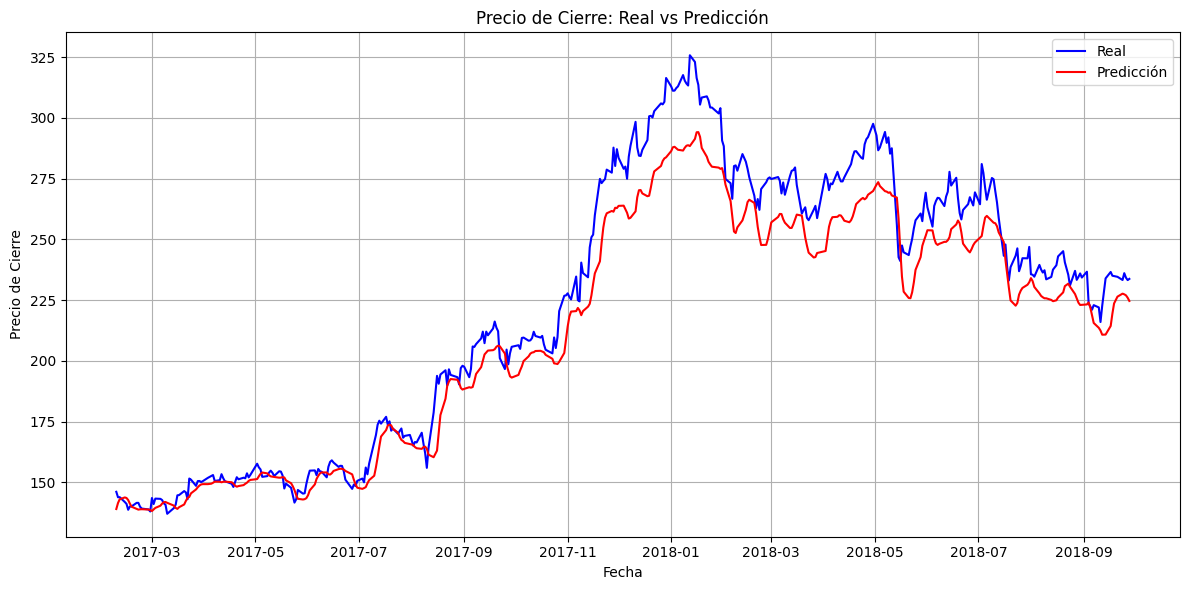

In [27]:
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][train_size:], y_test, label='Real', color='blue')
plt.plot(df['Date'][train_size:], predictions, label='Predicción', color='red')
plt.title('Precio de Cierre: Real vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Modelo LSTM

## Conclusión
Decidí usar una RNN LSTM, ya que el precio de las acciones es una serie de datos que evoluciona en el tiempo y lo que ocurre hoy suele depender de lo que pasó en días anteriores. Como las LSTM están diseñadas para capturar patrones y dependencias a lo largo del tiempo, son perfectas para este conjunto de datos.


La razón por la que se utiliza el optimizador ADAM es porque ajusta la tasa de aprendizaje individualmente para cada parámetro del modelo, lo cual es útil cuando se entrena una red compleja como una LSTM. Además, converge más rápido en la mayoría de los casos, incluso al tener muchos datos.
La función de pérdida seleccionada fue el MSE porque penaliza más los errores grandes.